## NESARC Data Analysis

NESARC (U.S. National Epidemiological Survey on Alcohol and Related Conditions) is a survey designed to determine the magnitude of alcohol use and psychiatric disorders in the U.S. population.

In [68]:
#Setting working directory and reading data

import os
import pandas as pd

os.chdir("C:/Users/Mounika/Documents/monica work/KAGGLE/Coursera")
data = pd.read_csv("nesarc_pds.csv",low_memory = False)

In [69]:
data.shape

(43093, 3010)

###### Research Question 1:

Does high alcohol consumption frequency lead to more fights with family, friends or people at work?

In [71]:
#S2AQ8A HOW OFTEN DRANK ANY ALCOHOL IN LAST 12 MONTHS

pd.unique(data['S2AQ8A'])

array([' ', '10', '6', '8', '5', '3', '7', '4', '2', '9', '1', '99'], dtype=object)

In [ ]:
#Checking for missing values

pd.isna(data.S2AQ8A).sum() 

In [72]:
#Recoding the levels to make them more readabale and meaningful

dict = {' ':'Non Drinker','1':'Every day','2':'Nearly every day','3':'3-4 times a week','4':'2 times a week','5':'Once a week','6':'2-3 times a week','7':'Once a month','8':'7-11 times in the last year','9':'3-6 times in the last year','10':'1 or 2 times in the last year','99':'Unkwown'}
data['ALCFREQ'] = data.S2AQ8A.map(dict)


In [73]:
#Converting to category type

data['ALCFREQ'] = data['ALCFREQ'].astype('category')

In [74]:
#Frequency distribution of the variable that describes how often an individual drank any alcohol in last 12 months

c1 = data['ALCFREQ'].value_counts()
print (c1)


Non Drinker                      16147
1 or 2 times in the last year     3637
2-3 times a week                  3557
Once a week                       3261
3-6 times in the last year        3210
2 times a week                    2914
Once a month                      2663
3-4 times a week                  2619
Every day                         1865
7-11 times in the last year       1805
Nearly every day                  1210
Unkwown                            205
Name: ALCFREQ, dtype: int64


C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


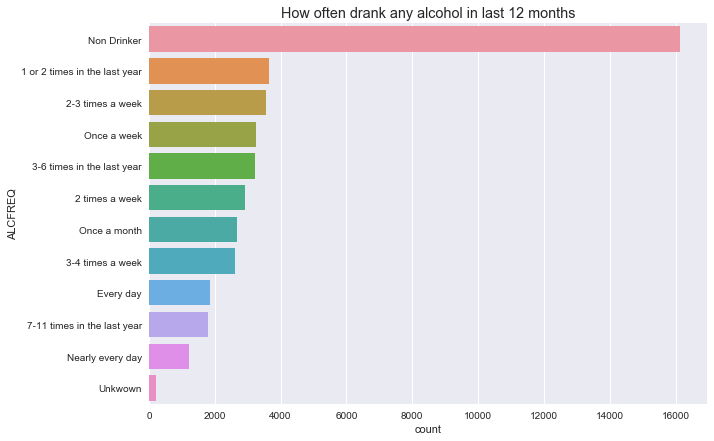

In [75]:
#Visual representation of the frequency distribution

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
plt.title("How often drank any alcohol in last 12 months")

sns.countplot(y="ALCFREQ", data=data,order=data['ALCFREQ'].value_counts().index)




We observe from the above frequency table and count plot that there are more non drinkers and people who consume alcohol every day or nearly every day are comparatively very less. But let us try to analyse if these individuals are more likely to indulge in fights or not. It is also important to note what type of alcohols are they frequently consuming because not all drinks have the same amount of alcohol content and thus the same effects.

In [76]:
#S2AQ23 MAIN TYPE OF ALCOHOL CONSUMED DURING PERIOD OF HEAVIEST DRINKING

pd.unique(data.S2AQ23)

array([' ', '2', '4', '1', '3', '9'], dtype=object)

In [77]:
pd.isna(data.S2AQ23).sum()

0

In [78]:
#Recoding levels

dict1 = {' ':'Non Drinker','1':'Coolers','2':'Beer','3':'Wine','4':'Liquor','9':'Unknown'}
data.S2AQ23 = data.S2AQ23.map(dict1)

In [79]:
data['S2AQ23'] = data['S2AQ23'].astype('category')

In [80]:
#Frequency table describing the counts for each type of alcohol

c2 = data['S2AQ23'].value_counts(normalize=True)
print (c2)


Beer           0.286613
Unknown        0.249344
Non Drinker    0.191818
Liquor         0.144989
Wine           0.085420
Coolers        0.041817
Name: S2AQ23, dtype: float64


C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


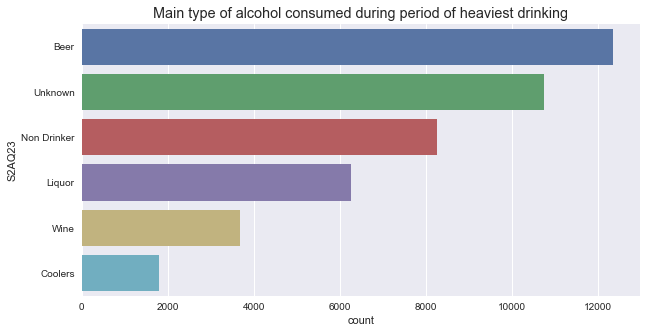

In [81]:
#Countplot displaying the counts for each type of variable

import matplotlib.pylab as pylab

plt.figure(figsize=(10,5))
params = {'axes.titlesize':'x-large'}
pylab.rcParams.update(params)

plt.title("Main type of alcohol consumed during period of heaviest drinking")

sns.countplot(y="S2AQ23", data=data,order=data['S2AQ23'].value_counts(normalize=True).index)



It is evident that beer is most often consumed by individuals (28% ) during their period of heaviest drinking and coolers are consumed least.

In [85]:


dict2 = {'1':'Yes','2':'No',' ':'No'}
data['S9Q52']=data['S9Q52'].replace(9, np.nan)
data.S9Q52 = data.S9Q52.map(dict2)

In [91]:
pd.unique(data['LIQRECF'])

array([' ', '0.4', '0.17', '0.755', '0.16', '0.28', '0.43', '0.64', '0.21',
       '0.38', '0.271', '0.47', '0.5', '0.395', '0.24', '0.35', '0.265',
       '0.45', '0.2', '0.95', '0.435', '0.505', '0.18', '0.8', '0.473',
       '0.455', '0.285', '0.535', '0.42', '0.25', '0.32', '0.495', '0.165',
       '0.452', '0.15', '0.375', '0.504', '0.3', '0.55'], dtype=object)

In [92]:
pd.unique(data['COOLECF'])


array([' ', '0.12', '0.056', '0.032', '0.05', '0.1', '0.045', '0.13',
       '0.059', '0.055', '0.052', '0.16', '0.048', '0.06', '0.042',
       '0.185', '0.125', '0.058', '0.15', '0.064', '0.047', '0.2', '0.14'], dtype=object)

In [93]:
pd.unique(data['BEERECF'])


array([' ', '0.042', '0.045', '0.05', '0.055', '0.043', '0.046', '0.056',
       '0.049', '0.036', '0.059', '0.048', '0.044', '0.065', '0.024',
       '0.079', '0.047', '0.06', '0.072', '0.041', '0.052', '0.058',
       '0.053', '0.054', '0.051', '0.039', '0.035', '0.066', '0.057',
       '0.064', '0.032', '0.084', '0.09', '0.085', '0.04', '0.038',
       '0.075', '0.062', '0.074', '0.07', '0.033', '0.125', '0.12', '0.08',
       '0.089', '0.071'], dtype=object)

In [94]:
pd.unique(data['WINEECF'])


array([' ', '0.125', '0.11', '0.135', '0.095', '0.06', '0.155', '0.1',
       '0.12', '0.115', '0.14', '0.08', '0.13', '0.09', '0.105', '0.18',
       '0.07', '0.19', '0.16', '0.075', '0.085', '0.175', '0.2', '0.05',
       '0.065', '0.145', '0.21', '0.139', '0.205'], dtype=object)

In [95]:
data['COOLECF'] = data['COOLECF'].convert_objects(convert_numeric=True)
data['BEERECF'] = data['BEERECF'].convert_objects(convert_numeric=True)
data['WINEECF'] = data['WINEECF'].convert_objects(convert_numeric=True)
data['LIQRECF'] = data['LIQRECF'].convert_objects(convert_numeric=True)

C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel 

In [207]:
#Creating a new column alc_by_vol which is the sum of the content of ethanol by vol of all drinks 

col_list = ['COOLECF','BEERECF','WINEECF','LIQRECF']
data['alc_by_vol'] = data[col_list].sum(axis=1)

In [208]:
data['alc_by_vol'].describe()

count    43093.000000
mean         0.191508
std          0.229858
min          0.000000
25%          0.000000
50%          0.050000
75%          0.442000
max          1.149000
Name: alc_by_vol, dtype: float64

In [209]:
data['abv1'] = data[data['alc_by_vol']>0.0]['alc_by_vol']

In [210]:
data['Ethanol_Content_By_Volume']=pd.cut(data.abv1, 3, labels=["ABV:0-0.403","ABV:0.404-0.775","ABV:0.781-1.149"])

In [100]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

In [101]:
pd.crosstab(data['Ethanol_Content_By_Volume'],data['alc_by_vol'])

alc_by_vol,0.0,0.032,0.035,0.036000000000000004,0.038,0.039,0.040999999999999995,0.042,0.043,0.044000000000000004,0.045,0.046,0.047,0.048,0.049,0.05,0.051,0.052000000000000005,0.053,0.054000000000000006,0.055,0.055999999999999994,0.057999999999999996,0.059000000000000004,0.06,0.065,0.07,0.07100000000000001,0.07200000000000001,0.073,0.07400000000000001,0.075,0.07600000000000001,0.077,0.078,0.079,0.08,0.081,0.082,0.08299999999999999,0.08399999999999999,0.084,0.085,0.086,0.08600000000000001,0.087,0.088,0.08800000000000001,0.089,0.09,0.091,0.092,0.093,0.094,0.095,0.096,0.09699999999999999,0.097,0.098,0.09899999999999999,0.099,0.1,0.10099999999999999,0.101,0.102,0.10200000000000001,0.103,0.104,0.10400000000000001,0.105,0.10500000000000001,0.106,0.107,0.10700000000000001,0.108,0.10800000000000001,0.109,0.10900000000000001,0.11,0.11099999999999999,0.11100000000000002,0.112,0.11200000000000002,0.114,0.115,0.11599999999999999,0.116,0.11699999999999999,0.117,0.118,0.119,0.11900000000000001,0.12,0.12000000000000001,0.122,0.12200000000000001,0.123,0.125,0.126,0.127,0.128,0.129,0.13,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.14,0.14100000000000001,0.14200000000000002,0.14300000000000002,0.14400000000000002,0.14500000000000002,0.14600000000000002,0.147,0.14700000000000002,0.148,0.14800000000000002,0.149,0.14900000000000002,0.15,0.15000000000000002,0.151,0.152,0.153,0.154,0.15400000000000003,0.155,0.156,0.157,0.158,0.159,0.16,0.16099999999999998,0.161,0.16199999999999998,0.162,0.16299999999999998,0.163,0.164,0.16499999999999998,0.165,0.16599999999999998,0.166,0.16699999999999998,0.167,0.16799999999999998,0.16899999999999998,0.169,0.16999999999999998,0.17,0.17099999999999999,0.171,0.172,0.17200000000000001,0.173,0.174,0.17400000000000002,0.175,0.176,0.177,0.17700000000000002,0.178,0.179,0.17900000000000002,0.18,0.181,0.18100000000000002,0.182,0.18200000000000002,0.183,0.184,0.18400000000000002,0.185,0.186,0.187,0.188,0.189,0.19,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.2,0.201,0.202,0.203,0.20400000000000001,0.205,0.20500000000000002,0.206,0.20600000000000002,0.207,0.20700000000000002,0.208,0.20800000000000002,0.20900000000000002,0.21,0.21000000000000002,0.211,0.21100000000000002,0.212,0.21200000000000002,0.213,0.21300000000000002,0.214,0.21400000000000002,0.215,0.21500000000000002,0.216,0.21600000000000003,0.217,0.21700000000000003,0.218,0.21800000000000003,0.219,0.21900000000000003,0.21999999999999997,0.22,0.22000000000000003,0.22099999999999997,0.221,0.22199999999999998,0.222,0.22200000000000003,0.22299999999999998,0.223,0.22300000000000003,0.22399999999999998,0.224,0.22499999999999998,0.225,0.22599999999999998,0.226,0.22600000000000003,0.22699999999999998,0.227,0.22799999999999998,0.228,0.22899999999999998,0.229,0.22999999999999998,0.23,0.23099999999999998,0.231,0.232,0.23299999999999998,0.233,0.234,0.235,0.23500000000000001,0.236,0.23600000000000002,0.237,0.23700000000000002,0.23800000000000002,0.239,0.24,0.24000000000000002,0.241,0.24100000000000002,0.242,0.24200000000000002,0.243,0.24400000000000002,0.245,0.246,0.248,0.249,0.25,0.252,0.253,0.255,0.256,0.257,0.258,0.259,0.262,0.264,0.265,0.266,0.267,0.268,0.269,0.27,0.271,0.272,0.273,0.274,0.275,0.277,0.278,0.279,0.28,0.281,0.282,0.28200000000000003,0.283,0.28300000000000003,0.285,0.28500000000000003,0.287,0.28700000000000003,0.288,0.28800000000000003,0.289,0.29,0.29000000000000004,0.291,0.292,0.29200000000000004,0.294,0.295,0.29500000000000004,0.296,0.29700000000000004,0.298,0.299,0.3,0.30000000000000004,0.301,0.30200000000000005,0.303,0.30300000000000005,0.30500000000000005,0.306,0.307,0.30700000000000005,0.308,0.309,0.31,0.31000000000000005,0.311,0.31100000000000005,0.312,0.31200000000000006,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.32,0.32000000000000006,0.321,0.322,0.323,0.324,0.32400000000000007,0.325,0.326,0.32699999999999996,0.327,0.328,0.329,0.32999999999999996,0.33,0.331,0.332,0.334,0.33499999999999996,0.335,0.33599999999999997,0.336,0.33699999999999997,

In [103]:
data['S9Q52'] = data['S9Q52'].astype('category')
data['S9Q52'] = data['S9Q52'].cat.rename_categories(["0","1"])
data['S9Q52'] = data['S9Q52'].astype("object")
data['S9Q52'] = data['S9Q52'].convert_objects(convert_numeric=True)

C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


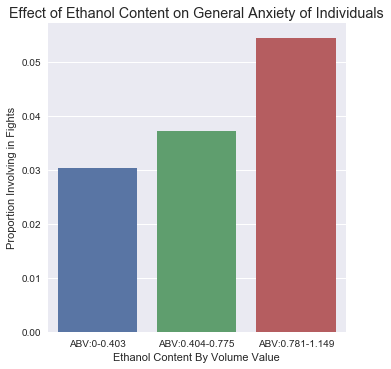

In [104]:
# bivariate bar graph C->C
sns.factorplot(x="Ethanol_Content_By_Volume", y="S9Q52", data=data, kind="bar", ci=None,size=5)
plt.title("Effect of Ethanol Content on General Anxiety of Individuals")
plt.xlabel("Ethanol Content By Volume Value")
plt.ylabel("Proportion Involving in Fights")

Here, we observe that as the ABV(Alcohol by volume) value increases, the proportion of individuals involving in fights also increases. There seems to be a positive correlation between both of them. However, before we confirm this relationship, let's check for their statistical significance.

In [106]:
import numpy as np

x = data['alc_by_vol'].replace(0.00, np.nan)

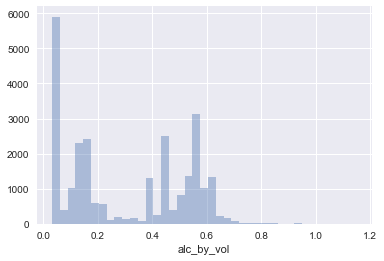

In [107]:
sns.distplot(x.dropna(), kde=False)

In [108]:
data['S9Q52'] = data['S9Q52'].astype('category')

In [109]:
import scipy.stats

# contingency table of observed counts
ct1=pd.crosstab(data['S9Q52'],data['Ethanol_Content_By_Volume'])
print(ct1)

Ethanol_Content_By_Volume  ABV:0-0.403  ABV:0.404-0.775  ABV:0.781-1.149
S9Q52                                                                   
0.0                              14721            10937               87
1.0                                461              423                5


In [110]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print(cs1)


Ethanol_Content_By_Volume  ABV:0-0.403  ABV:0.404-0.775  ABV:0.781-1.149
S9Q52                                                                   
0.0                           0.969635         0.962764         0.945652
1.0                           0.030365         0.037236         0.054348
chi-square value, p value, expected counts
(10.766260765107486, 0.0045934202377759118, 2, array([[  1.46752493e+04,   1.09808215e+04,   8.89291883e+01],
       [  5.06750695e+02,   3.79178494e+02,   3.07081174e+00]]))


We obtained a chi square statistic of 10.77 and as the p-value is less than 0.05, we conclude that we do not have enough evidence to support the null hypothesis and hence accept the alternate hypothesis that there is significant effect of amount of ethanol on general anxiety of individuals.

In [111]:
recode3 = {'ABV:0-0.403': 'ABV:0-0.403', 'ABV:0.404-0.775': 'ABV:0.404-0.775'}
data['ECV1']= data['Ethanol_Content_By_Volume'].map(recode3)

# contingency table of observed counts
ct2=pd.crosstab(data['ECV1'],data['S9Q52'])
print (ct2)

S9Q52              0.0  1.0
ECV1                       
ABV:0-0.403      14721  461
ABV:0.404-0.775  10937  423


In [112]:
# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

# chi-square
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

S9Q52                 0.0       1.0
ECV1                               
ABV:0-0.403      0.573739  0.521493
ABV:0.404-0.775  0.426261  0.478507
chi-square value, p value, expected counts
(9.3159015720579799, 0.0022717356853774492, 1, array([[ 14676.35279934,    505.64720066],
       [ 10981.64720066,    378.35279934]]))


In [113]:
recode4 = {'ABV:0-0.403': 'ABV:0-0.403', 'ABV:0.781-1.149': 'ABV:0.781-1.149'}
data['ECV2']= data['Ethanol_Content_By_Volume'].map(recode4)

# contingency table of observed counts
ct3=pd.crosstab(data['S9Q52'], data['ECV2'])
print (ct3)

ECV2   ABV:0-0.403  ABV:0.781-1.149
S9Q52                              
0.0          14721               87
1.0            461                5


In [114]:
# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

# chi-square
print ('chi-square value, p value, expected counts')
cs3= scipy.stats.chi2_contingency(ct3)
print (cs3)

ECV2   ABV:0-0.403  ABV:0.781-1.149
S9Q52                              
0.0       0.969635         0.945652
1.0       0.030365         0.054348
chi-square value, p value, expected counts
(1.0598496920541276, 0.30324946920795137, 1, array([[  1.47188069e+04,   8.91931387e+01],
       [  4.63193139e+02,   2.80686133e+00]]))


In [115]:
recode5 = {'ABV:0.404-0.775': 'ABV:0.404-0.775', 'ABV:0.781-1.149': 'ABV:0.781-1.149'}
data['ECV3']= data['Ethanol_Content_By_Volume'].map(recode5)

# contingency table of observed counts
ct4=pd.crosstab(data['S9Q52'], data['ECV3'])
print (ct4)

ECV3   ABV:0.404-0.775  ABV:0.781-1.149
S9Q52                                  
0.0              10937               87
1.0                423                5


In [116]:
# column percentages
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

# chi-square
print ('chi-square value, p value, expected counts')
cs4= scipy.stats.chi2_contingency(ct4)
print (cs4)

ECV3   ABV:0.404-0.775  ABV:0.781-1.149
S9Q52                                  
0.0           0.962764         0.945652
1.0           0.037236         0.054348
chi-square value, p value, expected counts
(0.34328631056558911, 0.55793841566830293, 1, array([[  1.09354384e+04,   8.85616486e+01],
       [  4.24561649e+02,   3.43835138e+00]]))


### ANOVA

In [117]:
#Relation between amount of ethanol consumed and general anxiety.

(data['ETOTLCA2']).max()

'9.9426'

In [120]:
pd.unique(data['ETOTLCA2'])

array([             nan,   1.40000000e-03,   2.10000000e-03, ...,
         1.58000000e+00,   6.83200000e-01,   1.40831000e+01])

In [119]:
data['ETOTLCA2'] = data['ETOTLCA2'].convert_objects(convert_numeric=True)

C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [121]:
pd.isna((data['ETOTLCA2'])).sum()

16438

In [123]:
data['ETOTLCA2'].describe()

count    26655.000000
mean         0.566016
std          2.216061
min          0.000300
25%          0.016300
50%          0.108100
75%          0.504000
max        219.955500
Name: ETOTLCA2, dtype: float64

In [140]:
data['MAJORDEPLIFE'] = data['MAJORDEPLIFE'].astype('category')

In [154]:
# using ols function for calculating the F-statistic and associated p value
import statsmodels.formula.api as smf

model1 = smf.ols(formula='ETOTLCA2 ~ C(MAJORDEPLIFE)', data=data)
results1 = model1.fit()

In [155]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ETOTLCA2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.86
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           1.42e-05
Time:                        19:42:14   Log-Likelihood:                -59022.
No. Observations:               26655   AIC:                         1.180e+05
Df Residuals:                   26653   BIC:                         1.181e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5366      0.015     35.377      0.000       0.507       0.566
C(MAJORDEPLIFE)[T.1]     0.1474      0.034      4.342      0.000       0.081       0.214
==============================================================================
Omnibus:                    84158.156   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      20279387185.777
Skew:                          50.216   Prob(JB):                         0.00
Kurtosis:                    4274.926   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
samp = data[['ETOTLCA2', 'MAJORDEPLIFE']].dropna()

print('Means for Ethanol Content by Major Depression Status')
m1= samp.groupby('MAJORDEPLIFE').mean()
print (m1)

print('Standard Deviations for Ethanol Content by Major Depression Status')
sd1 = samp.groupby('MAJORDEPLIFE').std()
print (sd1)

Means for Ethanol Content by Major Depression Status
              ETOTLCA2
MAJORDEPLIFE          
0             0.536584
1             0.683967
Standard Deviations for Ethanol Content by Major Depression Status
              ETOTLCA2
MAJORDEPLIFE          
0             1.442608
1             4.029460


C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


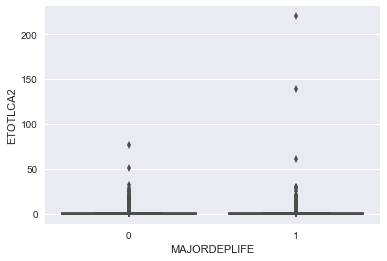

In [169]:
sns.boxplot(data['MAJORDEPLIFE'],data['ETOTLCA2'])

C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


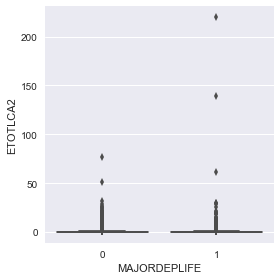

In [177]:
sns.factorplot(x="MAJORDEPLIFE", y="ETOTLCA2", kind="box", data=data)

#### PEARSON CORRELATION 

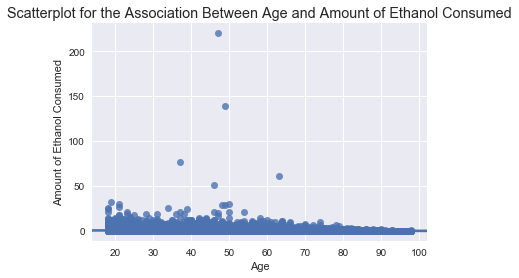

In [204]:
scat1 = sns.regplot(x="AGE", y="ETOTLCA2", fit_reg=True, data=data)
plt.xlabel('Age')
plt.ylabel('Amount of Ethanol Consumed')
plt.title('Scatterplot for the Association Between Age and Amount of Ethanol Consumed')

In [195]:
#Set PANDAS to show all rows in DataFrame
pd.set_option('display.max_rows', None)

In [198]:
pd.isna(data.ETOTLCA2).sum()

16438

In [200]:
data['ETOTLCA2'] = data['ETOTLCA2'].replace(np.nan,0)

In [201]:
pd.isna(data.ETOTLCA2).sum()

0

In [203]:
print ('Association between Age and Ethanol Content Consumed')
print (scipy.stats.pearsonr(data['AGE'], data['ETOTLCA2']))

Association between Age and Ethanol Content Consumed
(-0.056359894361780689, 1.1511779532553961e-31)


In [235]:
sample2 = sample1[['MAJORDEPLIFE','AGE','ETOTLCA2']]

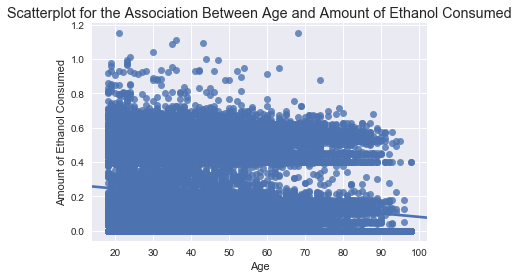

In [250]:
sns.regplot(x="AGE", y="alc_by_vol", fit_reg=True, data=data)
plt.xlabel('Age')
plt.ylabel('Amount of Ethanol Consumed')
plt.title('Scatterplot for the Association Between Age and Amount of Ethanol Consumed')

In [251]:
print ('Association between Age and Ethanol Content Consumed')
print (scipy.stats.pearsonr(data['AGE'], data['alc_by_vol']))

Association between Age and Ethanol Content Consumed
(-0.16265872269495299, 2.9543760108338874e-253)


In [252]:
data['AGE'].describe()

count    43093.000000
mean        46.400808
std         18.178612
min         18.000000
25%         32.000000
50%         44.000000
75%         59.000000
max         98.000000
Name: AGE, dtype: float64

In [238]:
pd.isna(sample2).sum()

MAJORDEPLIFE    0
AGE             0
ETOTLCA2        0
dtype: int64

In [255]:
model2 = smf.ols(formula='alc_by_vol ~ C(MAJORDEPLIFE)', data=data)
results2 = model2.fit()

In [256]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             alc_by_vol   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     354.3
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.02e-78
Time:                        15:44:57   Log-Likelihood:                 2390.0
No. Observations:               43093   AIC:                            -4776.
Df Residuals:                   43091   BIC:                            -4759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1817      0.001    149.046      0.000       0.179       0.184
C(MAJORDEPLIFE)[T.1]     0.0538      0.003     18.823      0.000       0.048       0.059
==============================================================================
Omnibus:                     9367.554   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6281.500
Skew:                           0.823   Prob(JB):                         0.00
Kurtosis:                       2.112   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
samp = data[['alc_by_vol', 'MAJORDEPLIFE']].dropna()

In [258]:

print('Means for Ethanol Content by Major Depression Status')
m1= samp.groupby('MAJORDEPLIFE').mean()
print (m1)

print('Standard Deviations for Ethanol Content by Major Depression Status')
sd1 = samp.groupby('MAJORDEPLIFE').std()
print (sd1)

Means for Ethanol Content by Major Depression Status
              alc_by_vol
MAJORDEPLIFE            
0               0.181720
1               0.235527
Standard Deviations for Ethanol Content by Major Depression Status
              alc_by_vol
MAJORDEPLIFE            
0               0.225845
1               0.242277
